In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

## Let's have a look at our data

In [3]:
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Let's check data types, we are dealing with
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# so over here we can see there are 5 variables with data type as integer, 2 with float, & 5 as object.
# Also Column cabin has more than 77% missing values, so ill drop this column later. Column Embarked has 2 missing values which can be easily imputed
# Challenge is dealing with age column.
# now we will perform a basic check on features

training_data.describe()

# This will show us 1, 2, 3 quartiles, how spread our data is and also we can figure out some basic ouliers through this.
# For Eg: minimum fare is 0, who are those and did they survive?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Lets Analyze data

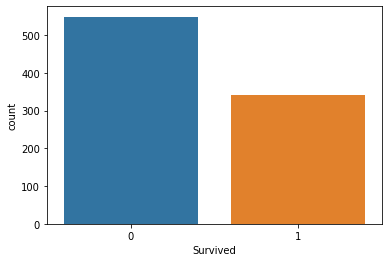

In [6]:
# we will analyze categorical variables:
sns.countplot(x= 'Survived', data = training_data)

# count of survival is less.

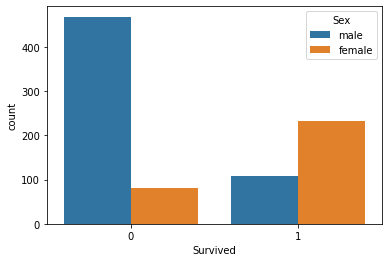

In [7]:
# Now we will check survival rate with respect to gender:
sns.countplot(x= 'Survived',hue='Sex',  data = training_data)
# seeing plot we can say that survival rate of female is high.

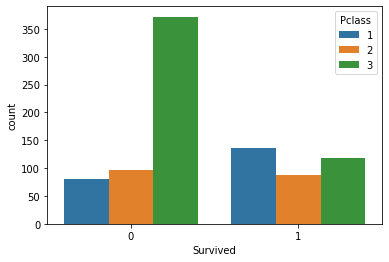

In [8]:
# Now we will check survival rate with respect to Pclass:
sns.countplot(x= 'Survived',hue='Pclass',  data = training_data)
# seeing plot we can say that survival rate of passengers in 1st class is high on the other side, count of survival for passengers of class-3 was very low 

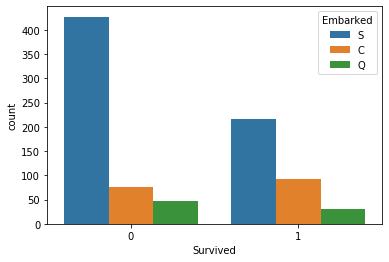

In [9]:
# Now we will check survival rate with respect to Embarked
sns.countplot(x= 'Survived',hue='Embarked',  data = training_data)
# seeing plot we can say that maximum people are from S = Southampton, survival rate of people from C = Cherbourg is decent.

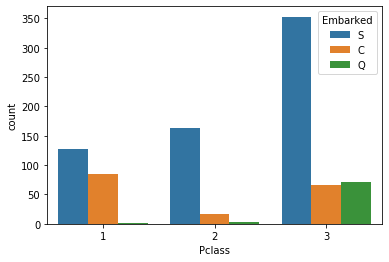

In [10]:
# Now we will check Pclass with Embarked
sns.countplot(x= 'Pclass',hue='Embarked',  data = training_data)
# the reason above we saw S = Southampton had low rate of survival because majority of them are in class 3, and survival rate of people from C = Cherbourg is decent because majority fo them belonged to 1st class.

(7, 0)

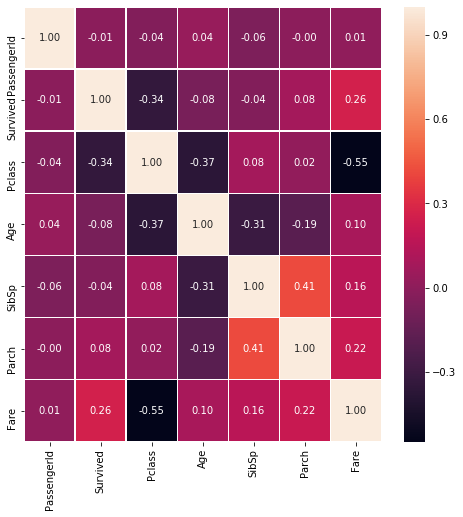

In [11]:
# Now we will check Collinearity among to avoid Multicollinearity issues.
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(training_data.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

# Eg: so it's common that higher the pclass, higher is the fare. Hence we would drop one of them to avoid redundant data, also passenger_Id will be dropped since not contributing to dependent variable.
# once all our categorical data has been converted we can also check Variance inflation factor, and correlation again.

C:\Users\Raj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


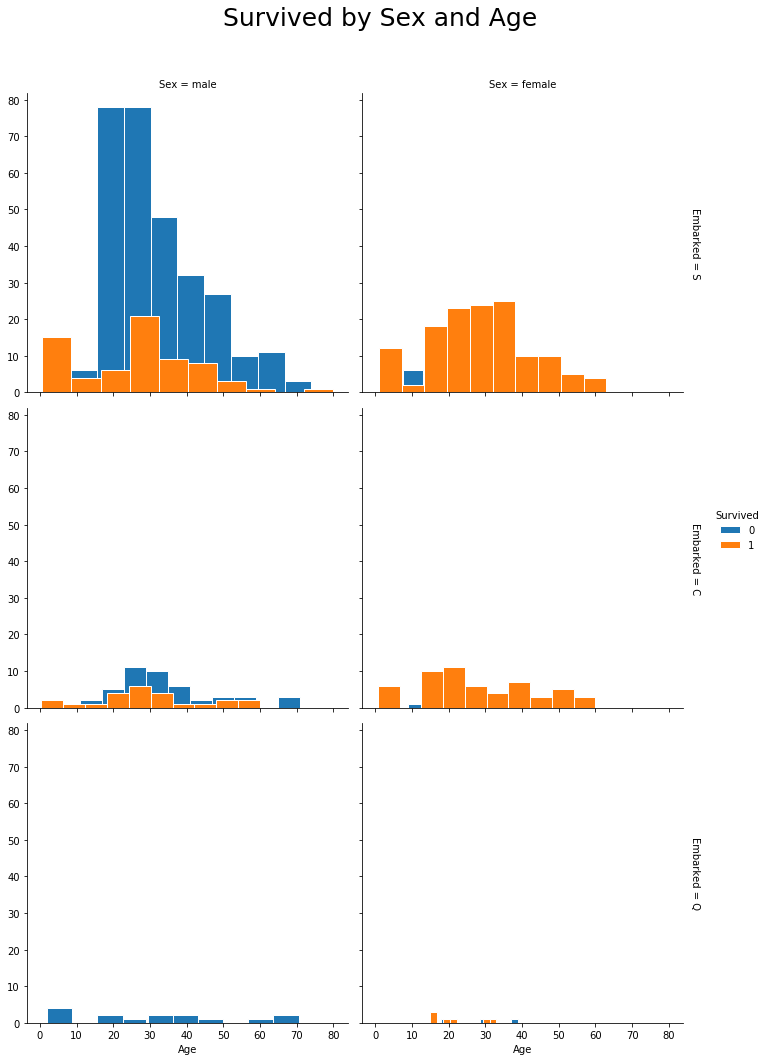

In [12]:
#Survived by Sex and Age

ploteg = sns.FacetGrid(training_data,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived"
                  )
plotegg = ploteg.map(plt.hist, "Age", edgecolor = 'white').add_legend();
ploteg.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

## Imputation

In [13]:
# let's check missing values in both training and test data

training_data.info()
print('*' *100)
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
P

# Missing data info:
Training dataframe: age column has 177 missing values, Embarked has 2, cabin is missing more than 70% data so we will drop it.

Test dataframe: age column has 86 missing values, fare column has 1, we will drop column cabin in test data also, 

In [14]:
# Let's deal with fare column in test data
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


C:\Users\Raj\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Raj\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


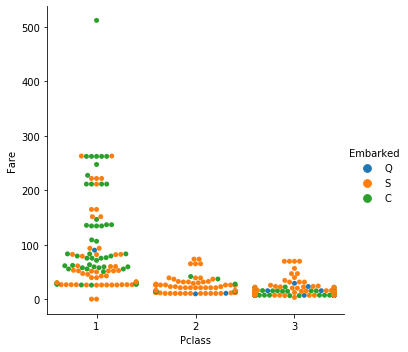

In [15]:
sns.catplot(x="Pclass", y="Fare",hue = "Embarked", kind="swarm", data=test_data);
# we can clearly see that majority of people who are from 'S' and 'Q' are in 2nd and 3rd class, also they are paying less fare.

In [16]:
#So we will group by Pclass, Embarked, and Parch after which we will impute fare with median values of people having same values.
median_far = test_data.groupby(['Pclass','Embarked','Parch']).Fare.median()[3]['S'][0]
test_data['Fare'] = test_data['Fare'].fillna(median_far)

In [17]:
# The above Graph will help us to deal with missing values in Embarked
training_data[training_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
# seeing the above graph we can impute these values by 'C'
training_data['Embarked'] = training_data['Embarked'].fillna('C')

In [19]:
training_data[training_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
# Let's deal With Age column Now
training_data[training_data['Age'].isnull()]
# As of now i'll impute age column with Median based on gender and check performance of the model and later on find a different strategy to deal with it.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [21]:
median_male_age = training_data.groupby(['Sex']).Age.median()['male']
median_male_age

median_female_age = training_data.groupby(['Sex']).Age.median()['female']
print(median_male_age)
print('*'*100)
print(median_female_age)

29.0
****************************************************************************************************
27.0


In [22]:
copy = training_data.copy()

conditions = [copy['Sex'] == "male", copy['Sex'] == "female"]
values = [29.0, 27.0]

# apply logic where company_type is null
copy['Age'] = np.where(copy['Age'].isnull(),
                              np.select(conditions, values),
                              copy['Age'])

In [23]:
#let's apply above logic on Training_data and Test_data

conditions = [training_data['Sex'] == "male", training_data['Sex'] == "female"]
values = [29.0, 27.0]
# apply logic where company_type is null
training_data['Age'] = np.where(training_data['Age'].isnull(),
                              np.select(conditions, values),
                              training_data['Age'])

In [24]:
training_data.info()
# As we can see we are done with training data and now let's apply same logic on test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# Test Data, first we need to find median for age column in test data

testing_male = test_data.groupby(['Sex']).Age.median()['male']

testing_female= test_data.groupby(['Sex']).Age.median()['female']
print(testing_male)
print('*'*100)
print(testing_female)

27.0
****************************************************************************************************
27.0


In [26]:
# since Median comes to same i'll apply same age to all missing values
test_data['Age'] = test_data['Age'].fillna(27)

In [27]:
## let's drop collumns which we won't we adding in our model
training_data = training_data.drop('PassengerId', axis=1)
training_data = training_data.drop('Cabin', axis=1)
training_data = training_data.drop('Ticket', axis=1)

In [28]:
# Drop them from test data also
test_data.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
test_data = test_data.drop('Ticket', axis=1)

# Let's convert Categorical columns and then we will check multicollinearity and VIF again

Now there are different encoding techniques but which one to choose depends on machine learning model also. Since i'll be using Logistic Regression as of now, the issue with Logistic regression will be:
Eg: In our dataset, there is this feature called Embarked, represented by "S", "C", "Q". Now the computer only likes to work with numbers, and as a result we need to convert S, C, Q into numbers. If we decide to use Label Encoding: Like labelling S = 0, C = 1, Q = 2. This shows that Q=2 has more weight than S=0 & C = 1, this can lead to wrong predictions.

Hence as of now i'll be using One Hot Encoding.

In [29]:
train_categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in train_categorical_features:
    dummies = pd.get_dummies(training_data[feature]).add_prefix(feature + '_')
    training_data = training_data.join(dummies)

In [30]:
training_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [31]:
test_categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in test_categorical_features:
    dummies = pd.get_dummies(test_data[feature]).add_prefix(feature + '_')
    test_data = test_data.join(dummies)
    
# Found this particular code from, source: https://www.kaggle.com/reighns/titanic-a-complete-beginner-s-guide

In [32]:
# let's drop useless features.
drop_column = ['Pclass','Name','Sex', 'Embarked']
training_data.drop(drop_column, axis=1, inplace = True)

drop_column = ['Pclass','Name','Sex', 'Embarked']
test_data.drop(drop_column, axis=1, inplace = True)

In [33]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived      891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Pclass_1      418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.5 KB


(13, 0)

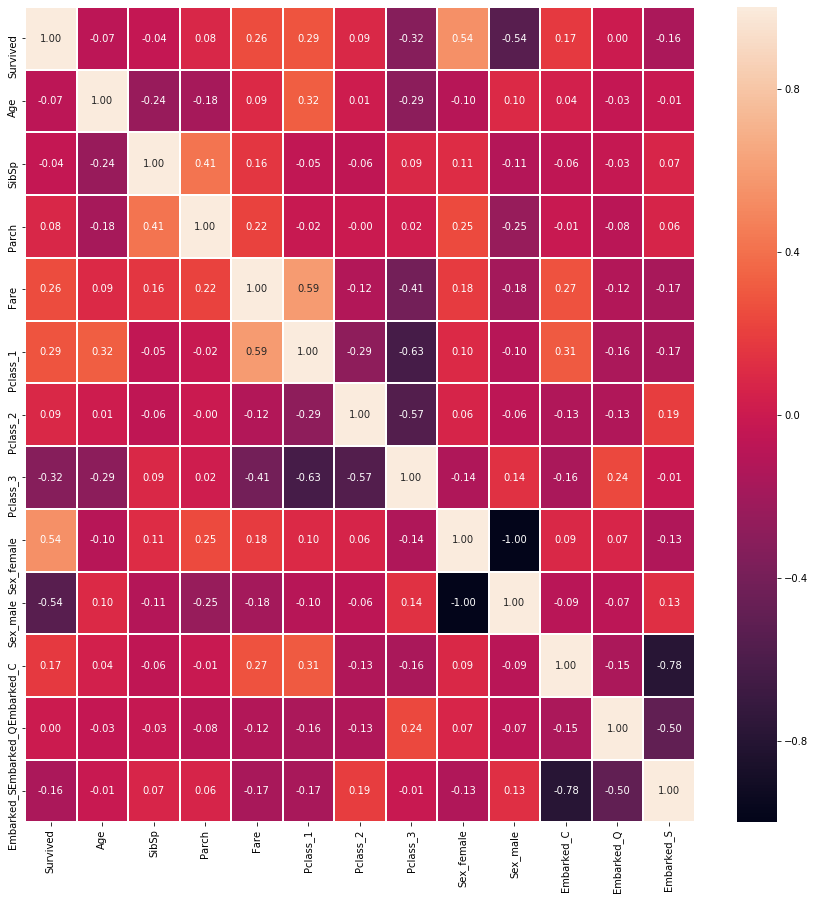

In [35]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(training_data.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
ax.set_ylim(13, 0)


## Now if we See Sex_Female and Sex_Male as 2 separate columns but logically: 
if value for female is 0 than it is male and if 1 than it is female so no need of 2 columns. Same logic can be applied to Embarked & Pclass. I'll drop extra columns.

In [36]:
drop_column = ['Pclass_3','Sex_male', 'Embarked_S']
training_data.drop(drop_column, axis=1, inplace = True)

drop_column = ['Pclass_3','Sex_male', 'Embarked_S']
test_data.drop(drop_column, axis=1, inplace = True)

(10, 0)

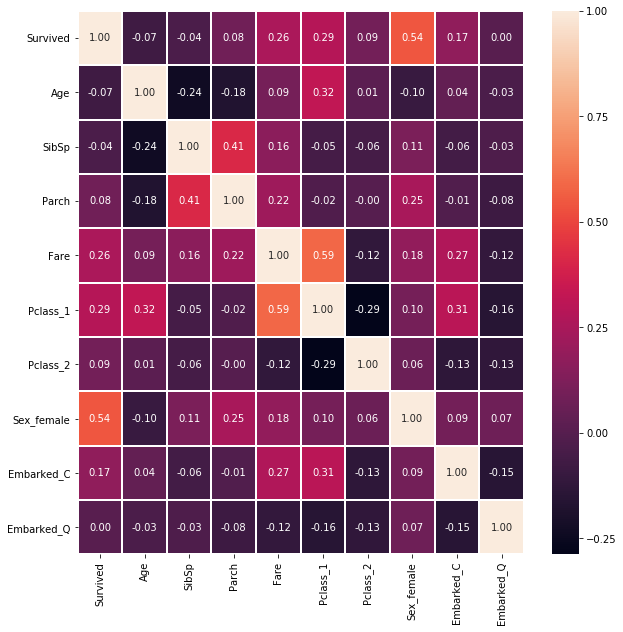

In [37]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(training_data.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
ax.set_ylim(10, 0)

In [38]:
copy_of_training_data = training_data.copy()

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

In [39]:
x1 = sm.tools.add_constant(copy_of_training_data)
series_before = pd.Series([variance_inflation_factor(x1.values, i)for i in range(x1.shape[1])], index = x1.columns)
display(series_before)

# the score for the independent features must be below 5 which shows there is no multicollinearity.
# link for more details, source: https://www.youtube.com/watch?v=8DhvVs59It4&list=PLcFcktZ0wnNkMqnUi8zUAPlO_swt-3GiJ&index=2

C:\Users\Raj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const         9.319735
Survived      1.662661
Age           1.267429
SibSp         1.300765
Parch         1.335141
Fare          1.767827
Pclass_1      2.201702
Pclass_2      1.231730
Sex_female    1.538633
Embarked_C    1.164393
Embarked_Q    1.112043
dtype: float64

## Let's Split our data

In [40]:
original_training_set_without_survived = training_data.drop("Survived", axis=1)
orginal_training_set_with_only_survived = training_data["Survived"]

In [41]:
original_training_set_without_survived.shape

(891, 9)

In [42]:
orginal_training_set_with_only_survived.shape

(891,)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    original_training_set_without_survived, orginal_training_set_with_only_survived, train_size=0.8, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 9) (712,)
(179, 9) (179,)


In [87]:
## We will be using standardscaler to transform the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)
## transforming "test_x"
X_test = sc.transform(X_test)

## transforming "The testset"
test_data = sc.transform(test_data)

In [88]:
## Lets call logistic regression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))

result = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))
# Let's predict survival for our Test_Data
testingonunknowndata = logreg.predict(test_data)

So, Our accuracy Score is: 0.80446927
Accuracy: 80.45%


## Let's Evaluate our model's performance:

In [46]:
# 1. Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,logreg.predict(X_test))
col=["Predicted Dead","Predicted Survived"]
cm=pd.DataFrame(cm)
cm.columns=["Predicted Dead","Predicted Survived"]
cm.index=["Actual Dead","Actual Survived"]
cm

,Predicted Dead,Predicted Survived
Actual Dead,93,17
Actual Survived,18,51


In [47]:
# 2. Classification report:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
classification_report(y_test, y_pred,target_names=target_names)
#The report shows the main classification metrics precision, recall and f1-score on a per-class basis.

# For detailed explanation visit, source: https://muthu.co/understanding-the-classification-report-in-sklearn/

'              precision    recall  f1-score   support\n\n     class 0       0.84      0.85      0.84       110\n     class 1       0.75      0.74      0.74        69\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [48]:
# A) Precision – What percent of your predictions were correct? Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

# B) Recall – What percent of your predictions were correct? Recall = TP/(TP+FN)
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

# C) F1 score – What percent of positive predictions were correct? F1 Score = 2*(Recall * Precision) / (Recall + Precision)
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Precision score: 0.75
Recall score: 0.7391304347826086
F1 Score: 0.7445255474452556


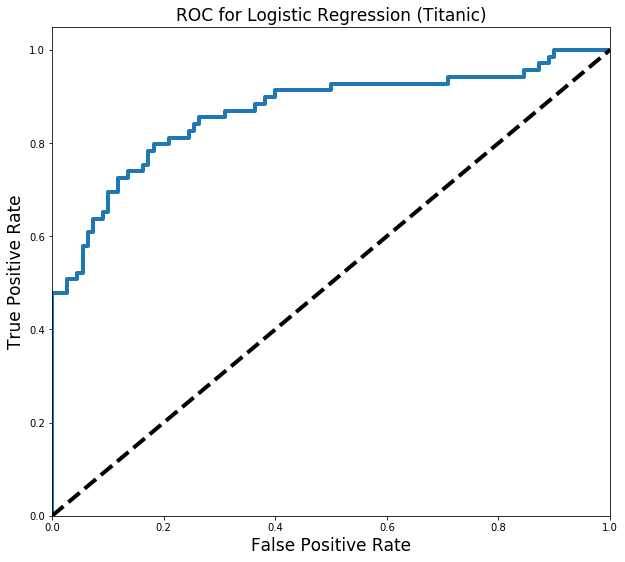

In [49]:
# Lets plot Roc-Curve of our model

from sklearn.metrics import roc_curve
y_pred_proba = logreg.decision_function(X_test) # because roc curve needs actual labels and predicted probabilities

FPR, TPR, THR = roc_curve(y_test, y_pred_proba)
#Next is draw roc graph.
plt.figure(figsize =[10,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)',linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.title('ROC for Logistic Regression (Titanic)', fontsize= 17)
plt.show()

# code Source: https://www.kaggle.com/reighns/titanic-a-complete-beginner-s-guide

In [50]:
# Lets check Roc-Auc(Area under Curve) score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.8667984189723321

## ASSUMPTION OF APPROPRIATE OUTCOME STRUCTURE
To begin, one of the main assumptions of logistic regression is the appropriate structure of the outcome
variable. Binary logistic regression requires the dependent variable to be binary and ordinal logistic
regression requires the dependent variable to be ordinal.
## ASSUMPTION OF OBSERVATION INDEPENDENCE
Logistic regression requires the observations to be independent of each other. In other words, the
observations should not come from repeated measurements or matched data.
## ASSUMPTION OF THE ABSENCE OF MULTICOLLINEARITY
Logistic regression requires there to be little or no multicollinearity among the independent variables. This
means that the independent variables should not be too highly correlated with each other.
## ASSUMPTION OF LINEARITY OF INDEPENDENT VARIABLES AND LOG ODDS
Logistic regression assumes linearity of independent variables and log odds. Although this analysis does
not require the dependent and independent variables to be related linearly, it requires that the independent
variables are linearly related to the log odds.

All our assumptions are met!

Source: https://www.lexjansen.com/wuss/2018/130_Final_Paper_PDF.pdf

In [51]:
Test_data1 = pd.read_csv('Titanic_test.csv')
Logisticoutput = pd.DataFrame({"PassengerId": Test_data1.PassengerId, "Survived":testingonunknowndata})
Logisticoutput.PassengerId = Logisticoutput.PassengerId.astype(int)
Logisticoutput.Survived = Logisticoutput.Survived.astype(int)

Logisticoutput.to_csv("Logisticoutput.csv", index=False)
print("Your submission was successfully saved!")
Logisticoutput.head(10)

Your submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Naive Bayes Model:

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
naivebayespred = gnb.predict(X_test)
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,naivebayespred),8)))

So, Our accuracy Score is: 0.7877095


## Let's Evaluate our model and compare it with Logistic Regression.

In [53]:
    # 1. Confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,logreg.predict(X_test))
col=["Predicted Dead","Predicted Survived"]
cm=pd.DataFrame(cm)
cm.columns=["Predicted Dead","Predicted Survived"]
cm.index=["Actual Dead","Actual Survived"]
print(cm)

print('*' *100)

    # 2. Confusion matrix for Naive Bayes
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,gnb.predict(X_test))
col1=["Predicted Dead","Predicted Survived"]
cm1=pd.DataFrame(cm1)
cm1.columns=["Predicted Dead","Predicted Survived"]
cm1.index=["Actual Dead","Actual Survived"]
print(cm1)


                 Predicted Dead  Predicted Survived
Actual Dead                  93                  17
Actual Survived              18                  51
****************************************************************************************************
                 Predicted Dead  Predicted Survived
Actual Dead                  87                  23
Actual Survived              15                  54


In [54]:
    # 1. For logistic Regression:

# A) Precision – What percent of your predictions were correct? Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

# B) Recall – What percent of your predictions were correct? Recall = TP/(TP+FN)
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

# C) F1 score – What percent of positive predictions were correct? F1 Score = 2*(Recall * Precision) / (Recall + Precision)
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

print('*#'*50)
    # 2. For Naive Bayes Regression:

# A) Precision – What percent of your predictions were correct? Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,naivebayespred)))

# B) Recall – What percent of your predictions were correct? Recall = TP/(TP+FN)
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,naivebayespred)))

# C) F1 score – What percent of positive predictions were correct? F1 Score = 2*(Recall * Precision) / (Recall + Precision)
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,naivebayespred)))


Precision score: 0.75
Recall score: 0.7391304347826086
F1 Score: 0.7445255474452556
*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#
Precision score: 0.7012987012987013
Recall score: 0.782608695652174
F1 Score: 0.7397260273972603


## I am just a beginner in this field and this is my first project, will try to train this data on different classification model's later
Any sort of constructive criticism is welcomed.

In [55]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train,y_train)
#SGDClassifier()

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
pred1= clf.predict(X_test)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, min_samples_split=20, max_leaf_nodes=10)

#Training the decision tree classifier. 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [58]:
dtc_pred =  dtc.predict(X_test)

In [59]:
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,dtc_pred),8)))

So, Our accuracy Score is: 0.82681564


In [60]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,dtc_pred)
#col1=["Predicted Dead","Predicted Survived"]
cm1=pd.DataFrame(cm1)
cm1.columns=["Predicted Dead","Predicted Survived"]
cm1.index=["Actual Dead","Actual Survived"]
print(cm1)

                 Predicted Dead  Predicted Survived
Actual Dead                 101                   9
Actual Survived              22                  47


In [76]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=2000)
results_kfold1 = model_selection.cross_val_score(model_kfold,original_training_set_without_survived, orginal_training_set_with_only_survived, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold1.mean()*100.0))

Accuracy: 79.69%


Why Random Forest?

Random forest is another ensemble ml technique which uses bagging technique. The base estimators are decision trees. One drawback of decision tree is that it has low bias but high variance and tends to overfit which can be overcomed by random forest because in the end we are aggragating decisions of multiple weak learners thus solving the problem of high variance. 

Also we are usning Bootstrapping, which is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The models run in parallel and are independent of each other. The final
predictions are determined by combining the predictions from all the models

Looking at it step-by-step, this is what a random forest model does:

1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

Note: The decision trees in random forest can be built on a subset of data and features. Particularly, the sklearn model of random forest uses all features for decision tree and a subset of features are randomly selected for splitting at each node.

To sum up, Random forest randomly selects data points and features, and builds multiple trees (Forest) .

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model1 = RandomForestClassifier(random_state = 42)
model1.fit(X_train,y_train)
predict_test = model1.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.8268156424581006


In [115]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,predict_test)
#col1=["Predicted Dead","Predicted Survived"]
cm1=pd.DataFrame(cm1)
cm1.columns=["Predicted Dead","Predicted Survived"]
cm1.index=["Actual Dead","Actual Survived"]
print(cm1)

                 Predicted Dead  Predicted Survived
Actual Dead                  99                  11
Actual Survived              20                  49
